In [63]:
#import numpy and pandas, and DataFrame, numpy and preprocessing
import pandas as pd
from pandas import DataFrame
import requests
import csv
from urllib.request import urlopen
import matplotlib.pyplot as plt
#import numpy as np
from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder
#%matplotlib inline

In [64]:
#Reading file #1: Unemployment Hispanics or Latinos in the US.    
#The next file shows the percentage of unemployment of Hispanics in the US for  every 1st of every month,
#staring on 1973 and ending on the current year, 2019.
r = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=LNS14000009&api_key=cc32522c021053498fbe94f21fd3eb17&file_type=json')
x = r.json()
df_HispUnempl = pd.DataFrame(x['observations'])
df_HispUnempl

,date,realtime_end,realtime_start,value
0,1973-03-01,2019-12-07,2019-12-07,7.3
1,1973-04-01,2019-12-07,2019-12-07,7.9
2,1973-05-01,2019-12-07,2019-12-07,8.1
3,1973-06-01,2019-12-07,2019-12-07,7.9
4,1973-07-01,2019-12-07,2019-12-07,7.2
5,1973-08-01,2019-12-07,2019-12-07,7.4
6,1973-09-01,2019-12-07,2019-12-07,7.7
7,1973-10-01,2019-12-07,2019-12-07,8.0
8,1973-11-01,2019-12-07,2019-12-07,8.1
9,1973-12-01,2019-12-07,2019-12-07,7.6


In [65]:
#Checking for missing values
df_HispUnempl.isnull().sum()

date              0
realtime_end      0
realtime_start    0
value             0
dtype: int64

In [66]:
#Checking for missing values
df_HispUnempl.isnull().values.any()

False

In [67]:
#Converting column date to time value   
df_HispUnempl['date'] = df_HispUnempl['date'].astype('datetime64[ns]')

In [68]:
df_HispUnempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
date              561 non-null datetime64[ns]
realtime_end      561 non-null object
realtime_start    561 non-null object
value             561 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 17.6+ KB


In [69]:
#Dropping unnecessary columns
df_HispUnempl.drop(['realtime_end','realtime_start'],axis=1)

,date,value
0,1973-03-01,7.3
1,1973-04-01,7.9
2,1973-05-01,8.1
3,1973-06-01,7.9
4,1973-07-01,7.2
5,1973-08-01,7.4
6,1973-09-01,7.7
7,1973-10-01,8.0
8,1973-11-01,8.1
9,1973-12-01,7.6


In [70]:
#Accessing the www2.census.gov website to get 18 files containing data about Hispanic immigration
#in the US 
lecture = urlopen('https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/national/asrh/nc-est2017-alldata-r-file01.csv')
output = lecture.read()
print(output)

b'UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE\r\nR,4.1,2010,999,308745538,151781326,156964212,119698920,122238141,19205040,21045595,1889695,1849811,7218477,7941039,342904,331721,3426290,3557905,122716053,125351477,20632690,22580483,3054732,3083750,8468047,920846

In [71]:
#Getting a total of 18 files from the Census websitewith the number of Hispanic immigrants in the US
data=pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/national/asrh/nc-est2017-alldata-r-file01.csv")
for i in range (2,19):
    File=str(i)
    data2 = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/national/asrh/nc-est2017-alldata-r-file" + File.zfill(2) + ".csv")
    data=data.append([data2], ignore_index=True)
    
#Cleaning the data
Clean_AGE=(data['AGE']==999)
Clean_data2 = data[Clean_AGE]

#4.1 is an estimate, then, it has to be eliminated
Clean_month2=(Clean_data2['MONTH'] != 4.1)
Clean_month=Clean_data2[Clean_month2]
Clean_month

,UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
102,R,4.2,2010,999,308758105,151788777,156969328,119703376,122242055,19207770,...,23290342,22548461,1430671,1499784,1085188,1011693,439161,442317,159476,152667
204,R,5.0,2010,999,308948752,151886954,157061798,119754272,122287809,19225959,...,23328473,22591342,1434294,1503376,1087066,1013512,440171,443316,159797,152958
306,R,6.0,2010,999,309134118,151979661,157154457,119801392,122333547,19242681,...,23366894,22634759,1437905,1506886,1089039,1015533,441216,444334,160158,153267
408,R,7.0,2010,999,309338421,152082993,157255428,119857656,122386250,19260328,...,23406869,22679232,1441564,1510465,1091072,1017558,442322,445382,160497,153614
510,R,8.0,2010,999,309558592,152194159,157364433,119917640,122442363,19279726,...,23449789,22727420,1445521,1514460,1093039,1019548,443355,446483,160767,153924
612,R,9.0,2010,999,309792032,152314025,157478007,119983176,122501418,19301248,...,23495740,22777149,1449691,1518626,1095154,1021672,444589,447586,161226,154263
714,R,10.0,2010,999,310023989,152431380,157592609,120047648,122561732,19321988,...,23540659,22826586,1453804,1522727,1097039,1023767,445727,448728,161602,154619
816,R,11.0,2010,999,310214733,152523306,157691427,120090369,122608136,19340447,...,23582345,22873756,1457736,1526697,1098747,1025637,446811,449823,161922,154948
918,R,12.0,2010,999,310394827,152609222,157785605,120126213,122650133,19360078,...,23623431,22919572,1461758,1530592,1100559,1027625,447936,450847,162275,155267
1020,R,1.0,2011,999,310591006,152713559,157877447,120177149,122688784,19381591,...,23666453,22966415,1465990,1534767,1102444,1029677,449015,452005,162650,155631


In [72]:
#Cleaning the Census Hispanic population files to get only the total Hispanic population 
pd.options.mode.chained_assignment = None
Hispanic_Population = Clean_month[['MONTH','YEAR','H_MALE','H_FEMALE']]
Hispanic_Population['Total']=Hispanic_Population['H_MALE'] + Hispanic_Population['H_FEMALE']
Hispanic_Population['Str_Month']=Hispanic_Population['MONTH'].map(str)
Hispanic_Population['Str_Month']=Hispanic_Population['Str_Month'].str.split('.').str[0]
Hispanic_Population['Str_Month'] = Hispanic_Population['Str_Month'].str.zfill(2)
Hispanic_Population['Str_Year']=Hispanic_Population['YEAR'].map(str)
Hispanic_Population['Date']=Hispanic_Population['Str_Year']+'-'+Hispanic_Population['Str_Month']+'-'+'01'


#Dropping unnecessary columns
Hispanic_Population.drop(['MONTH','YEAR','H_MALE','H_FEMALE','Str_Month','Str_Year'],axis=1)

,Total,Date
102,50478611,2010-04-01
204,50568452,2010-05-01
306,50659160,2010-06-01
408,50752801,2010-07-01
510,50853521,2010-08-01
612,50959434,2010-09-01
714,51063554,2010-10-01
816,51161653,2010-11-01
918,51258087,2010-12-01
1020,51358003,2011-01-01


In [73]:
#Defining the dates to be taken
unemployment_df = df_HispUnempl.loc[(df_HispUnempl.date >= '2010-04-01') & (df_HispUnempl.date <= '2018-12-01') ]
print (unemployment_df)

          date realtime_end realtime_start value
445 2010-04-01   2019-12-07     2019-12-07  12.5
446 2010-05-01   2019-12-07     2019-12-07  12.0
447 2010-06-01   2019-12-07     2019-12-07  12.3
448 2010-07-01   2019-12-07     2019-12-07  12.2
449 2010-08-01   2019-12-07     2019-12-07  12.0
450 2010-09-01   2019-12-07     2019-12-07  12.3
451 2010-10-01   2019-12-07     2019-12-07  12.3
452 2010-11-01   2019-12-07     2019-12-07  12.9
453 2010-12-01   2019-12-07     2019-12-07  12.9
454 2011-01-01   2019-12-07     2019-12-07  12.3
455 2011-02-01   2019-12-07     2019-12-07  11.8
456 2011-03-01   2019-12-07     2019-12-07  11.6
457 2011-04-01   2019-12-07     2019-12-07  11.9
458 2011-05-01   2019-12-07     2019-12-07  11.6
459 2011-06-01   2019-12-07     2019-12-07  11.5
460 2011-07-01   2019-12-07     2019-12-07  11.2
461 2011-08-01   2019-12-07     2019-12-07  11.2
462 2011-09-01   2019-12-07     2019-12-07  11.2
463 2011-10-01   2019-12-07     2019-12-07  11.3
464 2011-11-01   201

In [74]:
#Dropping unnecessary columns 
#unemployment_df.drop(['realtime_end','realtime_start'],axis=1)
#unemployment_df

In [85]:
# Create x, where x are the value colum with values as floats
x = unemployment_df[['value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2 = pd.DataFrame(x_scaled)

In [86]:
df_normalized2

,0
0,0.952941
1,0.894118
2,0.929412
3,0.917647
4,0.894118
5,0.929412
6,0.929412
7,1.000000
8,1.000000
9,0.929412


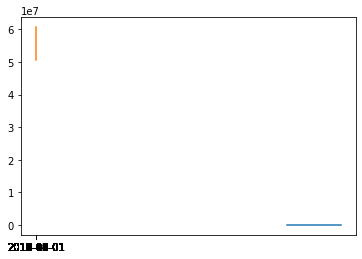

In [79]:
plt.plot(unemployment_df.date, df_normalized)
plt.plot(Hispanic_Population['Date'],Hispanic_Population['Total'])
plt.show()